# OpenCV Morphological Operations Tutorial

This notebook explores morphological operations in OpenCV, including erosion, dilation, opening, closing, and advanced morphological techniques.

## Contents
1. [Setup and Installation](#setup)
2. [Basic Morphological Operations](#basic)
3. [Advanced Morphological Operations](#advanced)
4. [Structuring Elements](#structuring)
5. [Applications in Image Processing](#applications)
6. [Practical Examples](#examples)
7. [Exercises](#exercises)

## 1. Setup and Installation {#setup}

First, let's import the necessary libraries and our custom modules.

In [23]:
# Install required packages if not already installed
# !pip install opencv-python numpy matplotlib

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Add our source directory to Python path
sys.path.append('../src')

# Import our custom modules
from morphological import basic_morphology, advanced_morphology
from basic_operations import image_io, display
from utils import visualization

print("✅ All modules imported successfully!")

✅ All modules imported successfully!


# Create Sample Images for Morphological Operations

Let's create binary and grayscale images to demonstrate morphological operations.

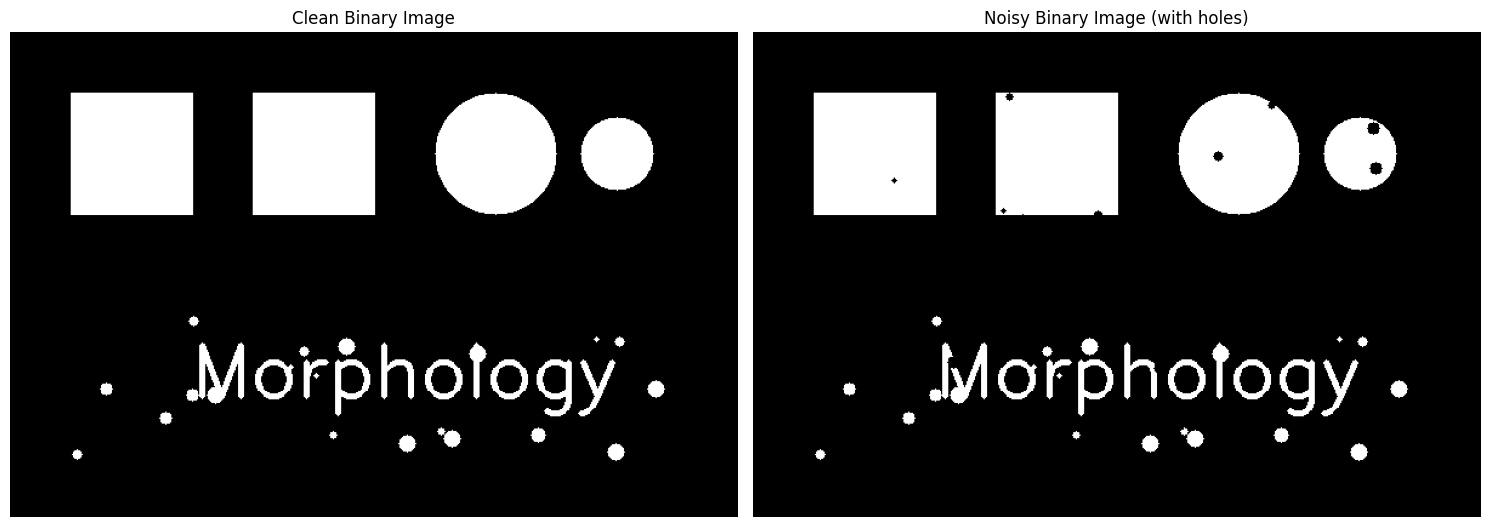

Binary image shape: (400, 600)
Unique values in binary image: [  0 255]


In [24]:
# Create a binary image with various shapes
binary_image = np.zeros((400, 600), dtype=np.uint8)

# Add rectangles
cv2.rectangle(binary_image, (50, 50), (150, 150), 255, -1)
cv2.rectangle(binary_image, (200, 50), (300, 150), 255, -1)

# Add circles
cv2.circle(binary_image, (400, 100), 50, 255, -1)
cv2.circle(binary_image, (500, 100), 30, 255, -1)

# Add some noise (small objects)
for i in range(20):
    x, y = np.random.randint(50, 550), np.random.randint(200, 350)
    cv2.circle(binary_image, (x, y), np.random.randint(2, 8), 255, -1)

# Add text
cv2.putText(binary_image, 'Morphology', (150, 300), cv2.FONT_HERSHEY_SIMPLEX, 2, 255, 3)

# Create a noisy binary image (with holes)
noisy_binary = binary_image.copy()
# Add holes
for i in range(30):
    x, y = np.random.randint(50, 550), np.random.randint(50, 350)
    cv2.circle(noisy_binary, (x, y), np.random.randint(2, 6), 0, -1)

# Display the images
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(binary_image, cmap='gray')
axes[0].set_title('Clean Binary Image')
axes[0].axis('off')

axes[1].imshow(noisy_binary, cmap='gray')
axes[1].set_title('Noisy Binary Image (with holes)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Binary image shape: {binary_image.shape}")
print(f"Unique values in binary image: {np.unique(binary_image)}")

## 2. Basic Morphological Operations {#basic}

The four fundamental morphological operations: erosion, dilation, opening, and closing.

### 2.1 Erosion
Erosion shrinks white regions and removes small objects and noise.

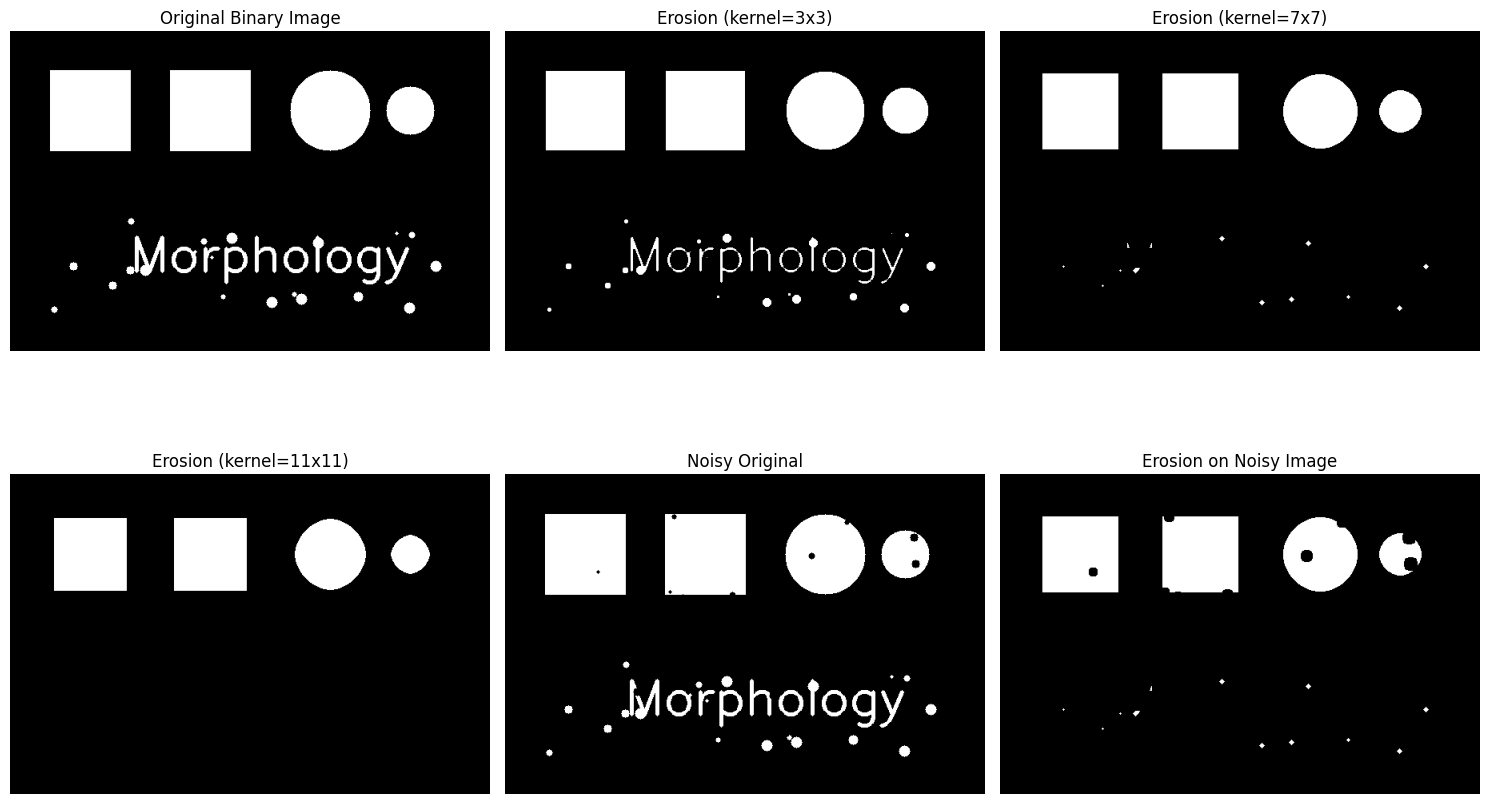

In [25]:
# Apply erosion with different kernel sizes
kernel_sizes = [3, 7, 11]
kernels = [cv2.getStructuringElement(cv2.MORPH_RECT, (k, k)) for k in kernel_sizes]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Show original in first position
axes[0, 0].imshow(binary_image, cmap='gray')
axes[0, 0].set_title('Original Binary Image')
axes[0, 0].axis('off')

# Apply erosion with different kernel sizes
for i, (kernel, ksize) in enumerate(zip(kernels, kernel_sizes)):
    eroded = basic_morphology.erode(binary_image, kernel)
    
    if i == 0:
        # Skip first position as it's the original
        axes[0, i+1].imshow(eroded, cmap='gray')
        axes[0, i+1].set_title(f'Erosion (kernel={ksize}x{ksize})')
        axes[0, i+1].axis('off')
    elif i == 1:
        axes[0, i+1].imshow(eroded, cmap='gray')
        axes[0, i+1].set_title(f'Erosion (kernel={ksize}x{ksize})')
        axes[0, i+1].axis('off')
    else:
        axes[1, 0].imshow(eroded, cmap='gray')
        axes[1, 0].set_title(f'Erosion (kernel={ksize}x{ksize})')
        axes[1, 0].axis('off')

# Show effect on noisy image
eroded_noisy = basic_morphology.erode(noisy_binary, kernels[1])
axes[1, 1].imshow(noisy_binary, cmap='gray')
axes[1, 1].set_title('Noisy Original')
axes[1, 1].axis('off')

axes[1, 2].imshow(eroded_noisy, cmap='gray')
axes[1, 2].set_title('Erosion on Noisy Image')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

### 2.2 Dilation
Dilation expands white regions and fills small holes.

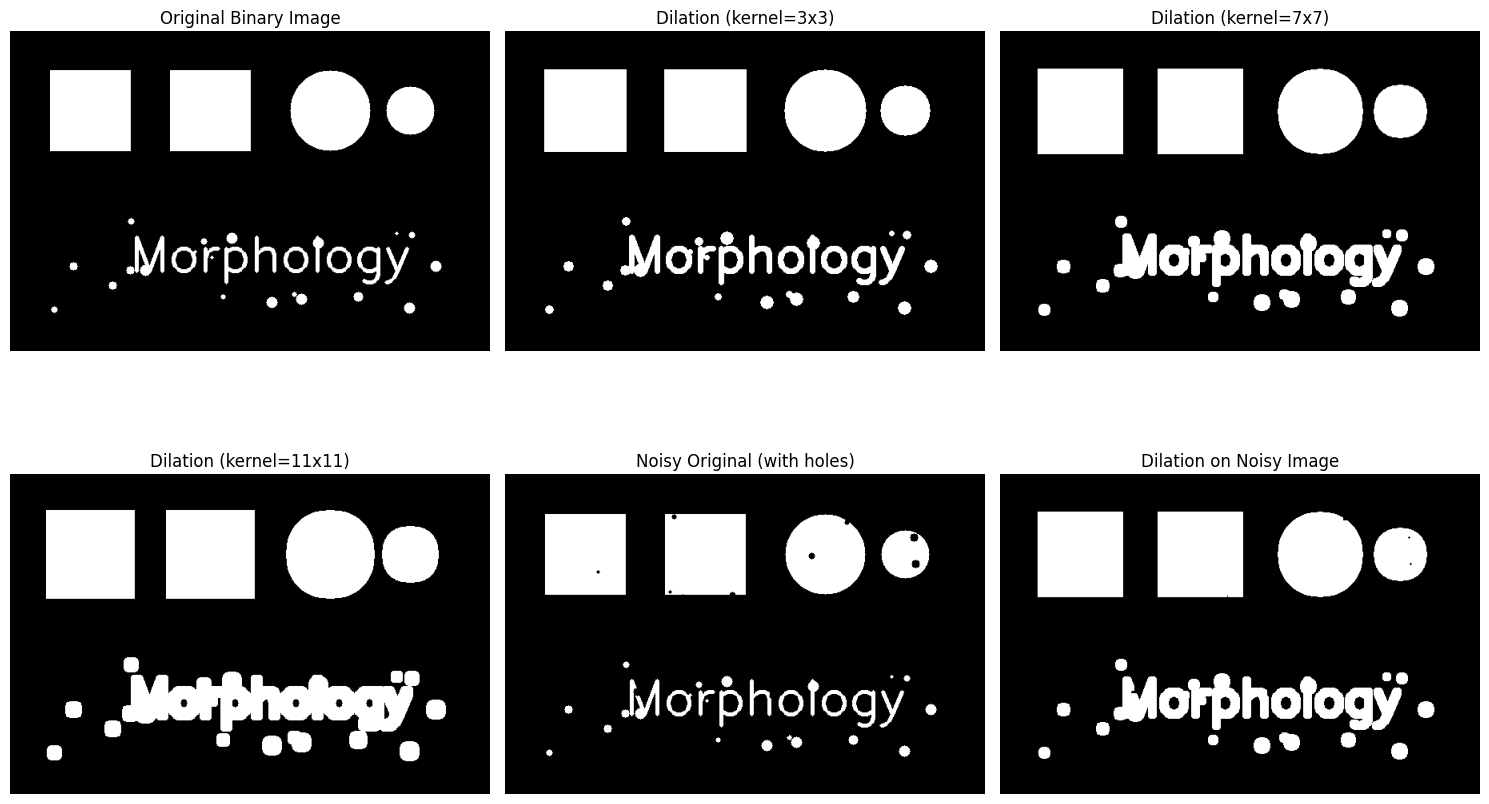

In [26]:
# Apply dilation with different kernel sizes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Show original
axes[0, 0].imshow(binary_image, cmap='gray')
axes[0, 0].set_title('Original Binary Image')
axes[0, 0].axis('off')

# Apply dilation with different kernel sizes
for i, (kernel, ksize) in enumerate(zip(kernels, kernel_sizes)):
    dilated = basic_morphology.dilate(binary_image, kernel)
    
    if i == 0:
        axes[0, i+1].imshow(dilated, cmap='gray')
        axes[0, i+1].set_title(f'Dilation (kernel={ksize}x{ksize})')
        axes[0, i+1].axis('off')
    elif i == 1:
        axes[0, i+1].imshow(dilated, cmap='gray')
        axes[0, i+1].set_title(f'Dilation (kernel={ksize}x{ksize})')
        axes[0, i+1].axis('off')
    else:
        axes[1, 0].imshow(dilated, cmap='gray')
        axes[1, 0].set_title(f'Dilation (kernel={ksize}x{ksize})')
        axes[1, 0].axis('off')

# Show effect on noisy image (fills holes)
dilated_noisy = basic_morphology.dilate(noisy_binary, kernels[1])
axes[1, 1].imshow(noisy_binary, cmap='gray')
axes[1, 1].set_title('Noisy Original (with holes)')
axes[1, 1].axis('off')

axes[1, 2].imshow(dilated_noisy, cmap='gray')
axes[1, 2].set_title('Dilation on Noisy Image')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

### 2.3 Opening
Opening = Erosion followed by Dilation. Removes noise while preserving shape.

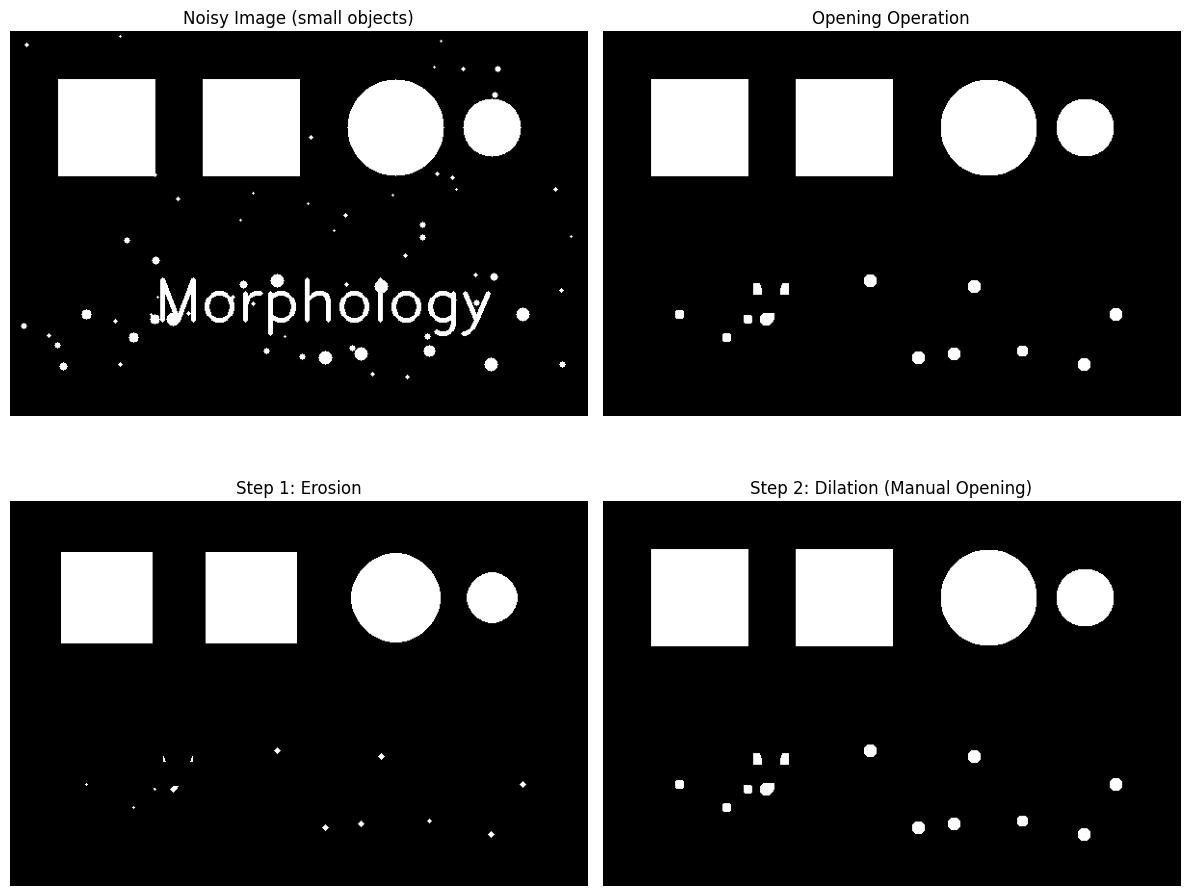

Opening = Erosion + Dilation
Purpose: Remove small objects while preserving larger structures


In [27]:
# Apply opening operation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))

# Create an image with noise for better demonstration
noisy_for_opening = binary_image.copy()
# Add small noise objects
for i in range(50):
    x, y = np.random.randint(0, 600), np.random.randint(0, 400)
    cv2.circle(noisy_for_opening, (x, y), np.random.randint(1, 4), 255, -1)

# Apply opening
opened = basic_morphology.open(noisy_for_opening, kernel)

# Manual opening (erosion + dilation) for comparison
manual_eroded = basic_morphology.erode(noisy_for_opening, kernel)
manual_opened = basic_morphology.dilate(manual_eroded, kernel)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(noisy_for_opening, cmap='gray')
axes[0, 0].set_title('Noisy Image (small objects)')
axes[0, 0].axis('off')

axes[0, 1].imshow(opened, cmap='gray')
axes[0, 1].set_title('Opening Operation')
axes[0, 1].axis('off')

axes[1, 0].imshow(manual_eroded, cmap='gray')
axes[1, 0].set_title('Step 1: Erosion')
axes[1, 0].axis('off')

axes[1, 1].imshow(manual_opened, cmap='gray')
axes[1, 1].set_title('Step 2: Dilation (Manual Opening)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("Opening = Erosion + Dilation")
print("Purpose: Remove small objects while preserving larger structures")

### 2.4 Closing
Closing = Dilation followed by Erosion. Fills holes while preserving shape.

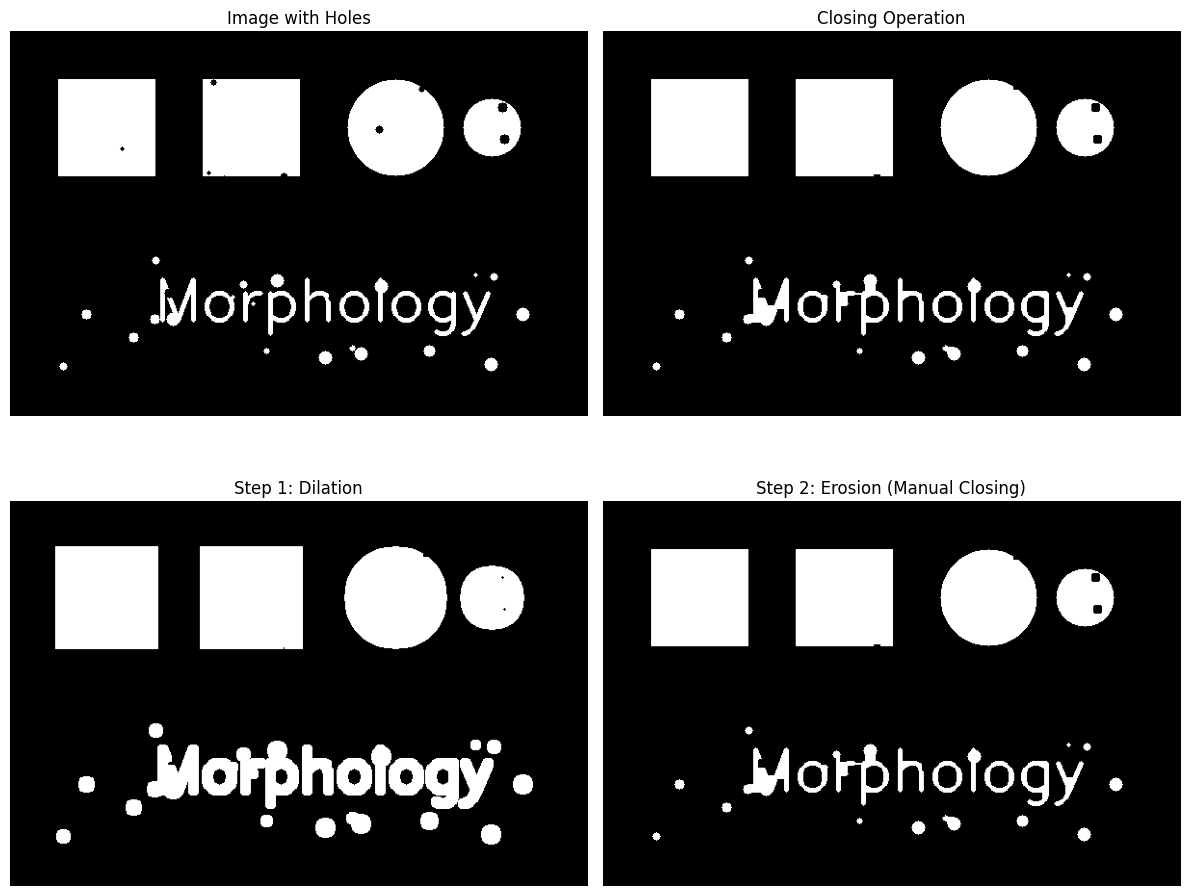

Closing = Dilation + Erosion
Purpose: Fill holes and gaps while preserving larger structures


In [28]:
# Apply closing operation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))

# Use the noisy image with holes
closed = basic_morphology.close(noisy_binary, kernel)

# Manual closing (dilation + erosion) for comparison
manual_dilated = basic_morphology.dilate(noisy_binary, kernel)
manual_closed = basic_morphology.erode(manual_dilated, kernel)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(noisy_binary, cmap='gray')
axes[0, 0].set_title('Image with Holes')
axes[0, 0].axis('off')

axes[0, 1].imshow(closed, cmap='gray')
axes[0, 1].set_title('Closing Operation')
axes[0, 1].axis('off')

axes[1, 0].imshow(manual_dilated, cmap='gray')
axes[1, 0].set_title('Step 1: Dilation')
axes[1, 0].axis('off')

axes[1, 1].imshow(manual_closed, cmap='gray')
axes[1, 1].set_title('Step 2: Erosion (Manual Closing)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("Closing = Dilation + Erosion")
print("Purpose: Fill holes and gaps while preserving larger structures")

## 3. Advanced Morphological Operations {#advanced}

More sophisticated operations derived from basic morphological operations.

### 3.1 Morphological Gradient
Shows the outline of objects (difference between dilation and erosion).

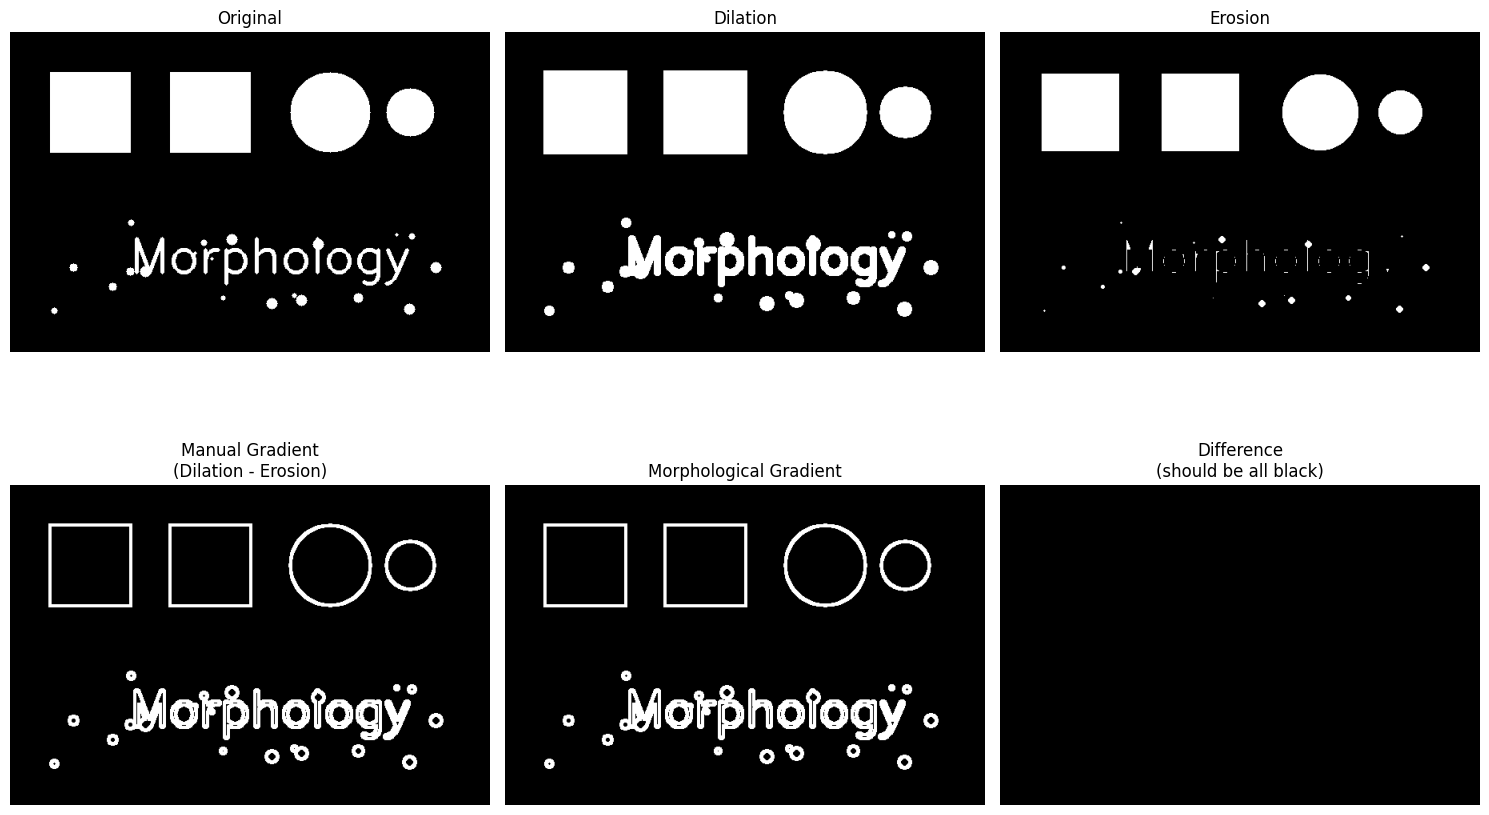

In [29]:
# Apply morphological gradient
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Calculate gradient manually and using OpenCV
dilated = basic_morphology.dilate(binary_image, kernel)
eroded = basic_morphology.erode(binary_image, kernel)
manual_gradient = cv2.subtract(dilated, eroded)

# Using OpenCV's morphological gradient
gradient = basic_morphology.morphological_gradient(binary_image, kernel)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(binary_image, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(dilated, cmap='gray')
axes[0, 1].set_title('Dilation')
axes[0, 1].axis('off')

axes[0, 2].imshow(eroded, cmap='gray')
axes[0, 2].set_title('Erosion')
axes[0, 2].axis('off')

axes[1, 0].imshow(manual_gradient, cmap='gray')
axes[1, 0].set_title('Manual Gradient\n(Dilation - Erosion)')
axes[1, 0].axis('off')

axes[1, 1].imshow(gradient, cmap='gray')
axes[1, 1].set_title('Morphological Gradient')
axes[1, 1].axis('off')

# Show difference
difference = cv2.absdiff(manual_gradient, gradient)
axes[1, 2].imshow(difference, cmap='gray')
axes[1, 2].set_title('Difference\n(should be all black)')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

### 3.2 Top Hat (White Top Hat)
Shows small bright objects on a dark background.

In [30]:
# Apply top hat transformation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))

# Manual top hat (original - opening)
opened = basic_morphology.open(detail_image, kernel)
manual_tophat = cv2.subtract(detail_image, opened)

# Using OpenCV's top hat
tophat = advanced_morphology.top_hat(detail_image, kernel)

### 3.3 Black Hat
Shows small dark objects on a bright background.

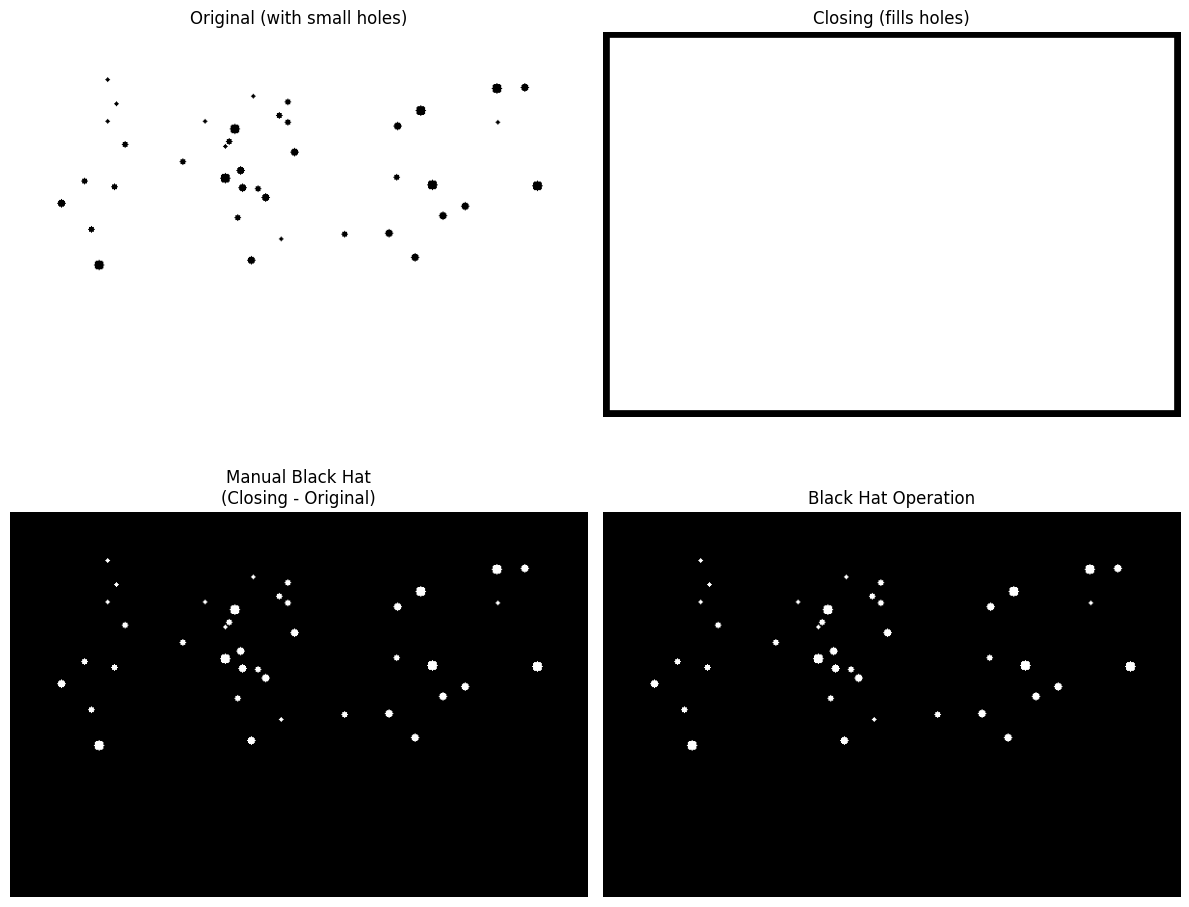

Black Hat = Closing - Original
Purpose: Highlight small dark objects (holes)


In [32]:
# Create image with small dark holes
hole_image = np.ones((400, 600), dtype=np.uint8) * 255
# Add large white regions
cv2.rectangle(hole_image, (50, 50), (250, 250), 255, -1)
cv2.rectangle(hole_image, (350, 50), (550, 250), 255, -1)

# Add small dark holes
for i in range(40):
    x, y = np.random.randint(50, 550), np.random.randint(50, 250)
    cv2.circle(hole_image, (x, y), np.random.randint(2, 6), 0, -1)

# Apply black hat transformation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))

# Manual black hat (closing - original)
closed = basic_morphology.close(hole_image, kernel)
manual_blackhat = cv2.subtract(closed, hole_image)

# Using OpenCV's black hat
blackhat = advanced_morphology.black_hat(hole_image, kernel)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(hole_image, cmap='gray')
axes[0, 0].set_title('Original (with small holes)')
axes[0, 0].axis('off')

axes[0, 1].imshow(closed, cmap='gray')
axes[0, 1].set_title('Closing (fills holes)')
axes[0, 1].axis('off')

axes[1, 0].imshow(manual_blackhat, cmap='gray')
axes[1, 0].set_title('Manual Black Hat\n(Closing - Original)')
axes[1, 0].axis('off')

axes[1, 1].imshow(blackhat, cmap='gray')
axes[1, 1].set_title('Black Hat Operation')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("Black Hat = Closing - Original")
print("Purpose: Highlight small dark objects (holes)")

## 4. Structuring Elements {#structuring}

Different shapes of structuring elements produce different effects.

### 4.1 Rectangular, Elliptical, and Cross Kernels

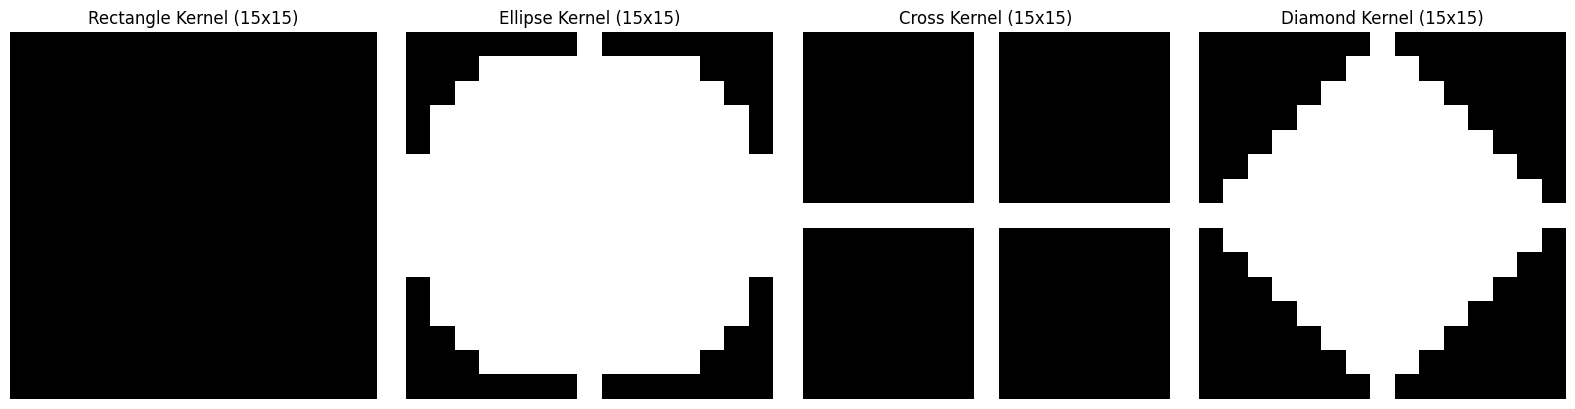

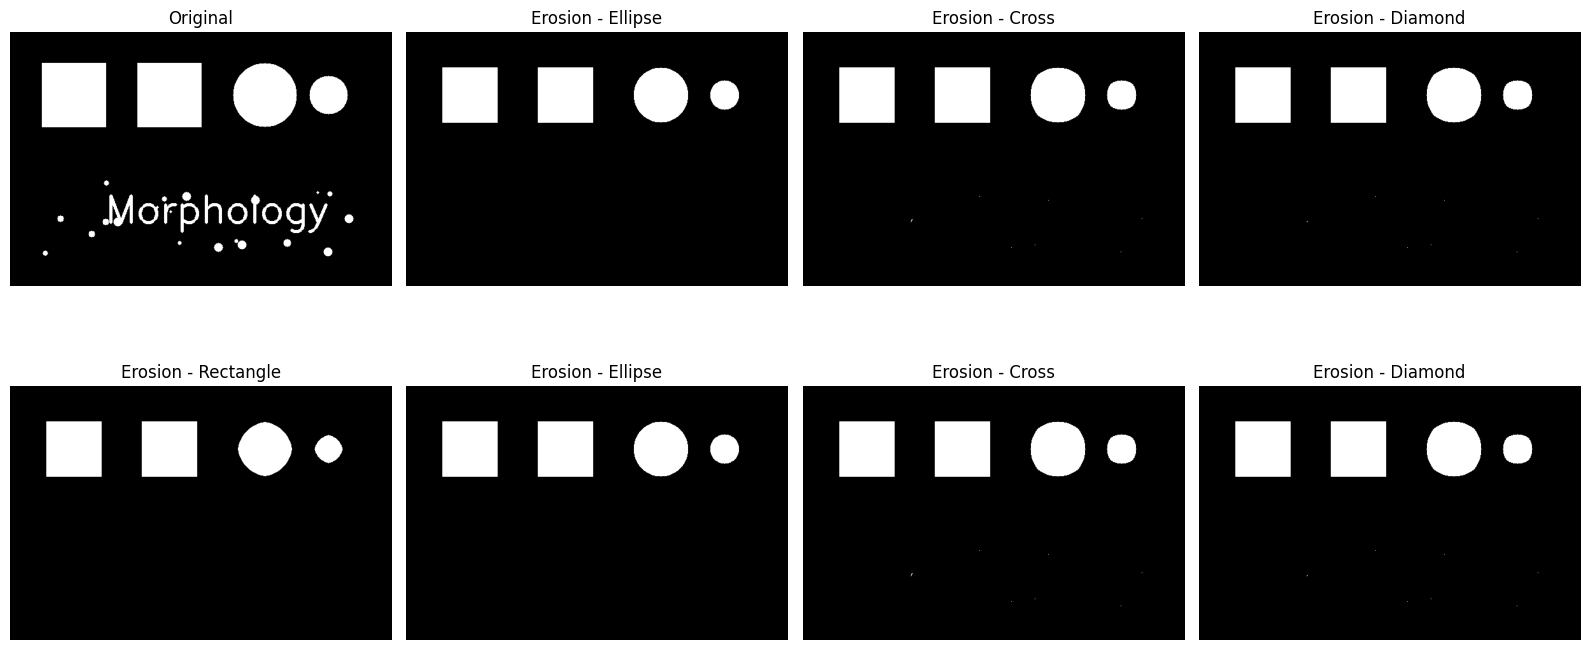

In [33]:
# Create different structuring elements
size = 15

# Different kernel types
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))
ellipse_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size, size))
cross_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (size, size))

# Custom diamond kernel
diamond_kernel = np.zeros((size, size), dtype=np.uint8)
center = size // 2
for i in range(size):
    for j in range(size):
        if abs(i - center) + abs(j - center) <= center:
            diamond_kernel[i, j] = 1

kernels = [rect_kernel, ellipse_kernel, cross_kernel, diamond_kernel]
kernel_names = ['Rectangle', 'Ellipse', 'Cross', 'Diamond']

# Visualize kernels
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for i, (kernel, name) in enumerate(zip(kernels, kernel_names)):
    axes[i].imshow(kernel, cmap='gray')
    axes[i].set_title(f'{name} Kernel ({size}x{size})')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Apply erosion with different kernels
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Original in first row, first column
axes[0, 0].imshow(binary_image, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

for i, (kernel, name) in enumerate(zip(kernels, kernel_names)):
    # Erosion
    eroded = basic_morphology.erode(binary_image, kernel)
    
    if i == 0:
        axes[0, i].imshow(binary_image, cmap='gray')
        axes[0, i].set_title('Original')
        axes[0, i].axis('off')
    else:
        axes[0, i].imshow(eroded, cmap='gray')
        axes[0, i].set_title(f'Erosion - {name}')
        axes[0, i].axis('off')
    
    # Show all erosion results in bottom row
    axes[1, i].imshow(eroded, cmap='gray')
    axes[1, i].set_title(f'Erosion - {name}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

### 4.2 Custom Structuring Elements
Creating specialized kernels for specific applications.

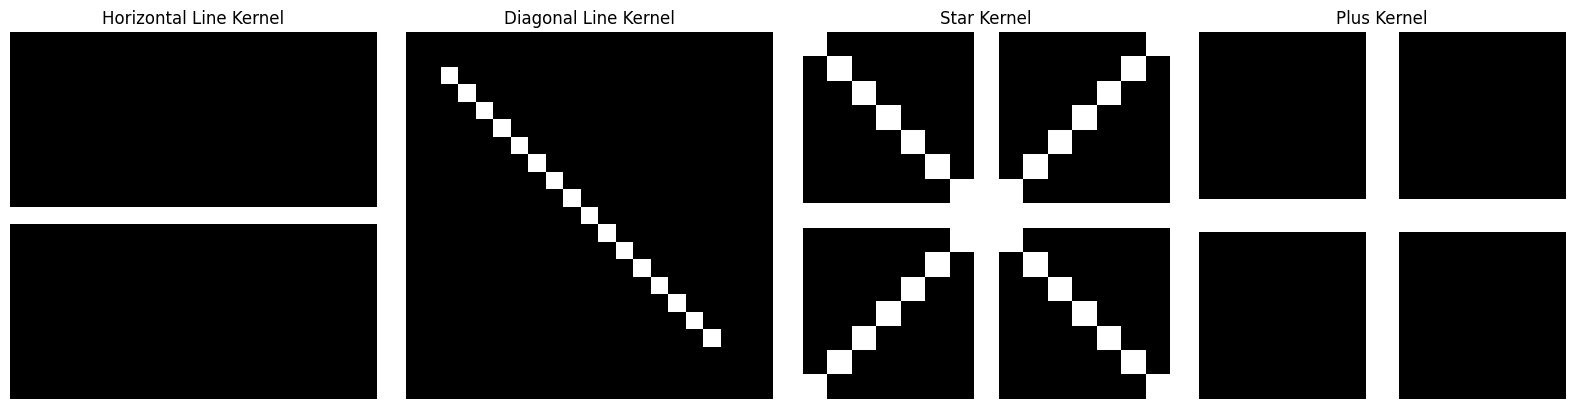

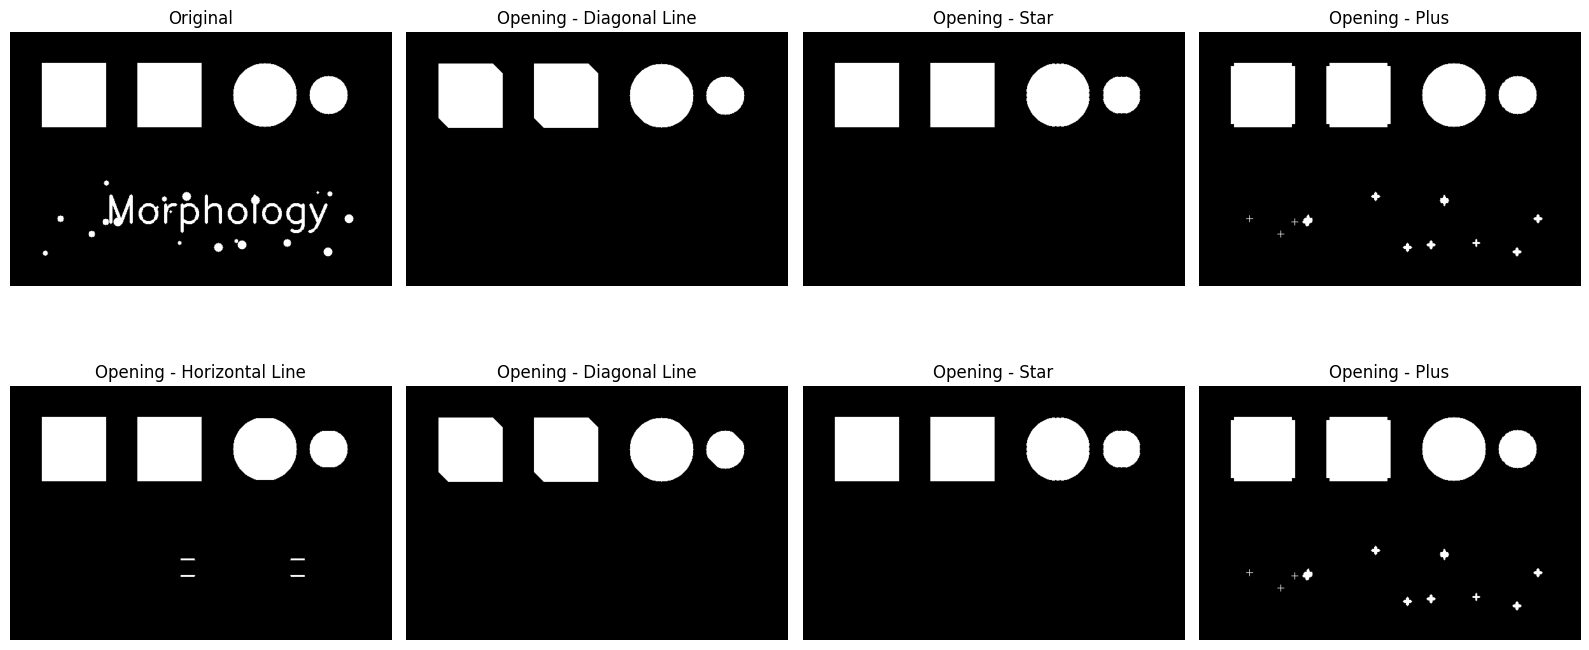

In [34]:
# Create custom structuring elements
def create_line_kernel(length, angle):
    """Create a line-shaped kernel at specified angle."""
    kernel = np.zeros((length*2+1, length*2+1), dtype=np.uint8)
    center = length
    
    for i in range(-length, length+1):
        x = int(center + i * np.cos(np.radians(angle)))
        y = int(center + i * np.sin(np.radians(angle)))
        if 0 <= x < kernel.shape[1] and 0 <= y < kernel.shape[0]:
            kernel[y, x] = 1
    
    return kernel

def create_star_kernel(size):
    """Create a star-shaped kernel."""
    kernel = np.zeros((size, size), dtype=np.uint8)
    center = size // 2
    
    # Create star pattern
    for i in range(size):
        kernel[center, i] = 1  # Horizontal line
        kernel[i, center] = 1  # Vertical line
        if i < size and center+i-center < size and center-i+center >= 0:
            kernel[i, i] = 1  # Diagonal
            kernel[i, size-1-i] = 1  # Other diagonal
    
    return kernel

# Create custom kernels
line_horizontal = create_line_kernel(10, 0)
line_diagonal = create_line_kernel(10, 45)
star_kernel = create_star_kernel(15)

# Plus-shaped kernel
plus_kernel = np.zeros((11, 11), dtype=np.uint8)
plus_kernel[5, :] = 1  # Horizontal line
plus_kernel[:, 5] = 1  # Vertical line

custom_kernels = [line_horizontal, line_diagonal, star_kernel, plus_kernel]
custom_names = ['Horizontal Line', 'Diagonal Line', 'Star', 'Plus']

# Visualize custom kernels
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for i, (kernel, name) in enumerate(zip(custom_kernels, custom_names)):
    axes[i].imshow(kernel, cmap='gray')
    axes[i].set_title(f'{name} Kernel')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Apply morphological operations with custom kernels
test_image = binary_image.copy()
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Original
axes[0, 0].imshow(test_image, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

for i, (kernel, name) in enumerate(zip(custom_kernels, custom_names)):
    # Opening operation
    opened = basic_morphology.open(test_image, kernel)
    
    if i == 0:
        axes[0, i].imshow(test_image, cmap='gray')
        axes[0, i].set_title('Original')
        axes[0, i].axis('off')
    else:
        axes[0, i].imshow(opened, cmap='gray')
        axes[0, i].set_title(f'Opening - {name}')
        axes[0, i].axis('off')
    
    # Show all results in bottom row
    axes[1, i].imshow(opened, cmap='gray')
    axes[1, i].set_title(f'Opening - {name}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

## 5. Applications in Image Processing {#applications}

Real-world applications of morphological operations.

### 5.1 Noise Removal and Object Cleaning

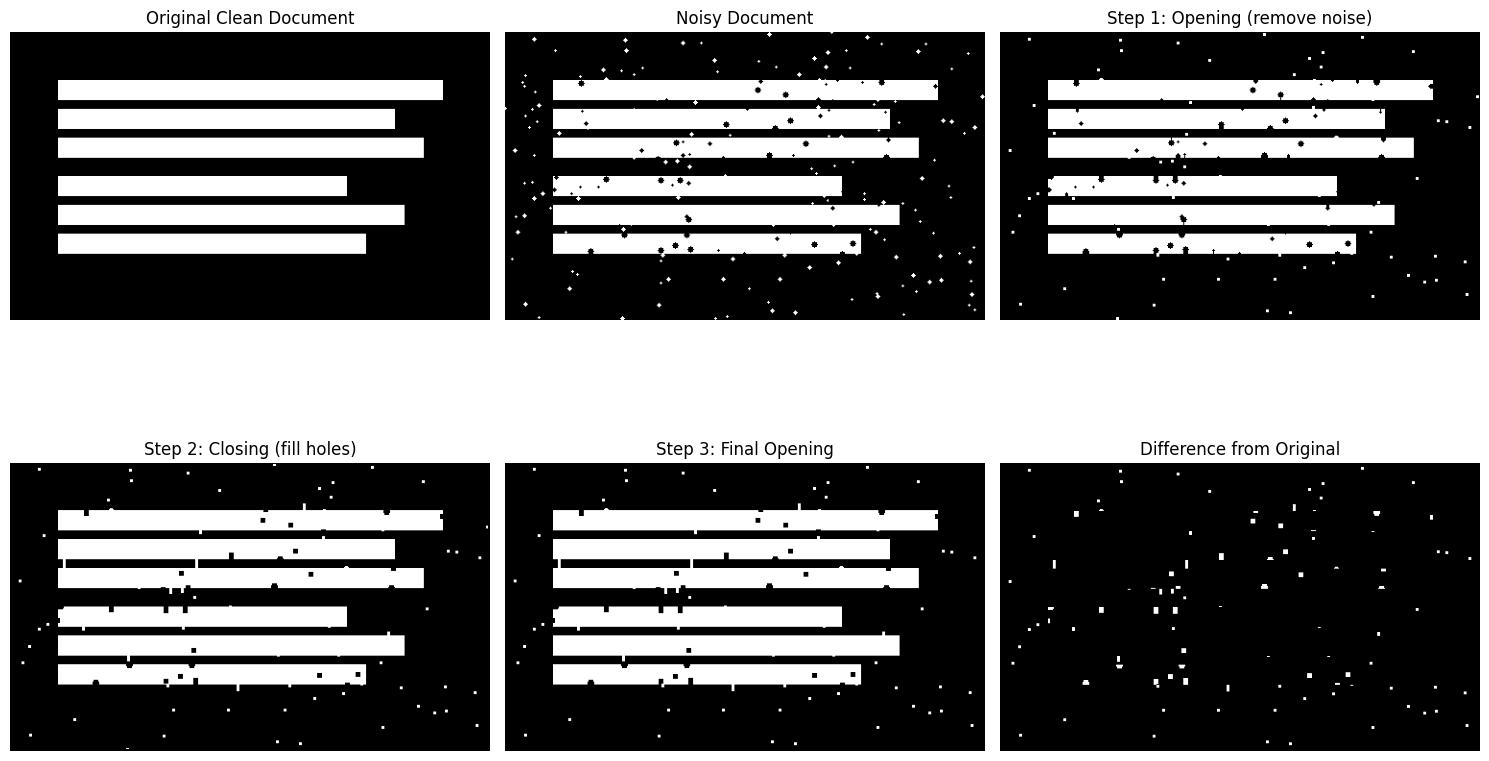

Morphological cleaning pipeline:
1. Opening: Remove small noise objects
2. Closing: Fill holes and gaps
3. Opening: Restore original shapes


In [35]:
# Create a noisy document-like image
document = np.zeros((300, 500), dtype=np.uint8)

# Add text-like rectangles
text_blocks = [
    (50, 50, 400, 20), (50, 80, 350, 20), (50, 110, 380, 20),
    (50, 150, 300, 20), (50, 180, 360, 20), (50, 210, 320, 20)
]

for x, y, w, h in text_blocks:
    cv2.rectangle(document, (x, y), (x+w, y+h), 255, -1)

# Add noise
noisy_document = document.copy()
for i in range(200):
    x, y = np.random.randint(0, 500), np.random.randint(0, 300)
    cv2.circle(noisy_document, (x, y), np.random.randint(1, 3), 255, -1)

# Add holes in text
for i in range(100):
    x, y = np.random.randint(50, 450), np.random.randint(50, 250)
    cv2.circle(noisy_document, (x, y), np.random.randint(1, 4), 0, -1)

# Clean the document using morphological operations
kernel_small = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
kernel_medium = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Step 1: Remove small noise with opening
cleaned_step1 = basic_morphology.open(noisy_document, kernel_small)

# Step 2: Fill holes with closing
cleaned_step2 = basic_morphology.close(cleaned_step1, kernel_medium)

# Step 3: Final opening to restore shape
cleaned_final = basic_morphology.open(cleaned_step2, kernel_small)

# Display cleaning process
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(document, cmap='gray')
axes[0, 0].set_title('Original Clean Document')
axes[0, 0].axis('off')

axes[0, 1].imshow(noisy_document, cmap='gray')
axes[0, 1].set_title('Noisy Document')
axes[0, 1].axis('off')

axes[0, 2].imshow(cleaned_step1, cmap='gray')
axes[0, 2].set_title('Step 1: Opening (remove noise)')
axes[0, 2].axis('off')

axes[1, 0].imshow(cleaned_step2, cmap='gray')
axes[1, 0].set_title('Step 2: Closing (fill holes)')
axes[1, 0].axis('off')

axes[1, 1].imshow(cleaned_final, cmap='gray')
axes[1, 1].set_title('Step 3: Final Opening')
axes[1, 1].axis('off')

# Show improvement
improvement = cv2.absdiff(document, cleaned_final)
axes[1, 2].imshow(improvement, cmap='gray')
axes[1, 2].set_title('Difference from Original')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("Morphological cleaning pipeline:")
print("1. Opening: Remove small noise objects")
print("2. Closing: Fill holes and gaps")
print("3. Opening: Restore original shapes")

### 5.2 Boundary Extraction
Using morphological gradient to extract object boundaries.

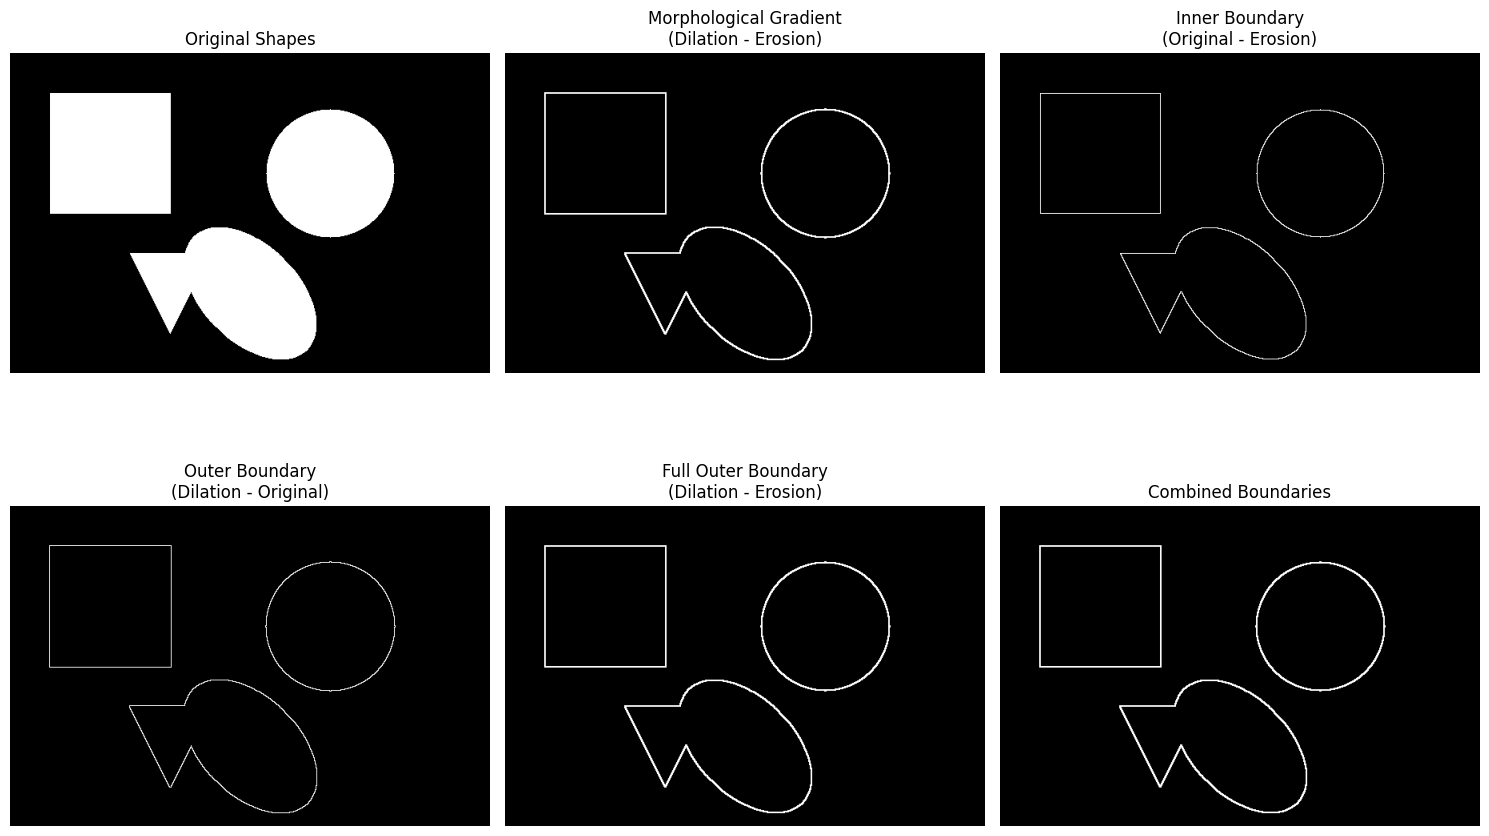

In [38]:
# Load or create a test image with clear objects
shapes_image = np.zeros((400, 600), dtype=np.uint8)

# Add various shapes
cv2.rectangle(shapes_image, (50, 50), (200, 200), 255, -1)
cv2.circle(shapes_image, (400, 150), 80, 255, -1)
cv2.ellipse(shapes_image, (300, 300), (100, 60), 45, 0, 360, 255, -1)

# Create polygon (triangle)
triangle = np.array([[150, 250], [250, 250], [200, 350]], np.int32)
cv2.fillPoly(shapes_image, [triangle], 255)

# Extract boundaries using different methods
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Reload the module to ensure we have the latest version
import importlib
importlib.reload(advanced_morphology)

# Method 1: Morphological gradient
boundary_gradient = advanced_morphology.morphological_gradient(shapes_image, kernel)

# Method 2: Original - Erosion
eroded = basic_morphology.erode(shapes_image, kernel)
boundary_erosion = cv2.subtract(shapes_image, eroded)

# Method 3: Dilation - Original
dilated = basic_morphology.dilate(shapes_image, kernel)
boundary_dilation = cv2.subtract(dilated, shapes_image)

# Method 4: Outer boundary (Dilation - Erosion)
boundary_outer = cv2.subtract(dilated, eroded)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(shapes_image, cmap='gray')
axes[0, 0].set_title('Original Shapes')
axes[0, 0].axis('off')

axes[0, 1].imshow(boundary_gradient, cmap='gray')
axes[0, 1].set_title('Morphological Gradient\n(Dilation - Erosion)')
axes[0, 1].axis('off')

axes[0, 2].imshow(boundary_erosion, cmap='gray')
axes[0, 2].set_title('Inner Boundary\n(Original - Erosion)')
axes[0, 2].axis('off')

axes[1, 0].imshow(boundary_dilation, cmap='gray')
axes[1, 0].set_title('Outer Boundary\n(Dilation - Original)')
axes[1, 0].axis('off')

axes[1, 1].imshow(boundary_outer, cmap='gray')
axes[1, 1].set_title('Full Outer Boundary\n(Dilation - Erosion)')
axes[1, 1].axis('off')

# Combine inner and outer boundaries
combined_boundary = cv2.bitwise_or(boundary_erosion, boundary_dilation)
axes[1, 2].imshow(combined_boundary, cmap='gray')
axes[1, 2].set_title('Combined Boundaries')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

### 5.3 Skeletonization
Reducing objects to their skeletal structure.

In [ ]:
# Create an image suitable for skeletonization
skel_image = np.zeros((400, 600), dtype=np.uint8)

# Add shapes that will produce interesting skeletons
cv2.rectangle(skel_image, (50, 150), (200, 250), 255, -1)  # Rectangle
cv2.circle(skel_image, (350, 200), 60, 255, -1)  # Circle

# Add a more complex shape (letter-like)
letter_points = np.array([
    [450, 100], [500, 100], [500, 300], [480, 300], [480, 200],
    [470, 200], [470, 300], [450, 300]
], np.int32)
cv2.fillPoly(skel_image, [letter_points], 255)

# Perform skeletonization using morphological operations
skeleton = advanced_morphology.skeletonize(skel_image)

# Alternative: Zhang-Suen skeletonization (if available)
try:
    # This requires scikit-image
    from skimage.morphology import skeletonize as skimage_skeleton
    skeleton_skimage = skimage_skeleton(skel_image // 255) * 255
except ImportError:
    skeleton_skimage = skeleton.copy()

# Endpoint detection on skeleton
endpoints = advanced_morphology.find_endpoints(skeleton)

# Branch point detection
branch_points = advanced_morphology.find_branch_points(skeleton)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(skel_image, cmap='gray')
axes[0, 0].set_title('Original Shapes')
axes[0, 0].axis('off')

axes[0, 1].imshow(skeleton, cmap='gray')
axes[0, 1].set_title('Skeleton (Morphological)')
axes[0, 1].axis('off')

axes[0, 2].imshow(skeleton_skimage, cmap='gray')
axes[0, 2].set_title('Skeleton (Zhang-Suen)')
axes[0, 2].axis('off')

# Overlay endpoints and branch points
skeleton_with_points = cv2.cvtColor(skeleton, cv2.COLOR_GRAY2BGR)
skeleton_with_points[endpoints > 0] = [0, 0, 255]  # Red endpoints
skeleton_with_points[branch_points > 0] = [0, 255, 0]  # Green branch points

axes[1, 0].imshow(skeleton_with_points)
axes[1, 0].set_title('Skeleton with Features\n(Red: endpoints, Green: branches)')
axes[1, 0].axis('off')

axes[1, 1].imshow(endpoints, cmap='gray')
axes[1, 1].set_title('Endpoints')
axes[1, 1].axis('off')

axes[1, 2].imshow(branch_points, cmap='gray')
axes[1, 2].set_title('Branch Points')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print(f"Number of endpoints found: {np.sum(endpoints > 0)}")
print(f"Number of branch points found: {np.sum(branch_points > 0)}")

## 6. Practical Examples {#examples}

### 6.1 License Plate Character Cleaning

In [ ]:
# Simulate a license plate with noisy characters
plate = np.zeros((100, 300), dtype=np.uint8)

# Add character-like shapes
chars = [
    (20, 20, 40, 60),   # Character 1
    (70, 20, 40, 60),   # Character 2  
    (120, 20, 40, 60),  # Character 3
    (170, 20, 40, 60),  # Character 4
    (220, 20, 40, 60),  # Character 5
]

for x, y, w, h in chars:
    cv2.rectangle(plate, (x, y), (x+w, y+h), 255, -1)
    # Add some internal structure
    cv2.rectangle(plate, (x+10, y+10), (x+w-10, y+20), 0, -1)

# Add noise and damage
noisy_plate = plate.copy()

# Add salt and pepper noise
noise_mask = np.random.random(plate.shape) < 0.05
noisy_plate[noise_mask] = 255 - noisy_plate[noise_mask]

# Add some erosion damage
damage_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
for _ in range(3):
    x, y = np.random.randint(0, 300), np.random.randint(0, 100)
    cv2.circle(noisy_plate, (x, y), np.random.randint(2, 5), 0, -1)

# Clean the license plate
# Step 1: Remove small noise
clean_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
cleaned_step1 = basic_morphology.open(noisy_plate, clean_kernel)

# Step 2: Fill small holes
cleaned_step2 = basic_morphology.close(cleaned_step1, clean_kernel)

# Step 3: Final morphological cleaning
final_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
cleaned_final = basic_morphology.open(cleaned_step2, final_kernel)

# Display the cleaning process
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(plate, cmap='gray')
axes[0, 0].set_title('Original License Plate')
axes[0, 0].axis('off')

axes[0, 1].imshow(noisy_plate, cmap='gray')
axes[0, 1].set_title('Damaged/Noisy Plate')
axes[0, 1].axis('off')

axes[1, 0].imshow(cleaned_step2, cmap='gray')
axes[1, 0].set_title('After Opening + Closing')
axes[1, 0].axis('off')

axes[1, 1].imshow(cleaned_final, cmap='gray')
axes[1, 1].set_title('Final Cleaned Plate')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

### 6.2 Fingerprint Enhancement

In [ ]:
# Create a simulated fingerprint pattern
fingerprint = np.zeros((300, 300), dtype=np.uint8)

# Create ridge-like patterns
center_x, center_y = 150, 150
for radius in range(20, 140, 8):
    for angle in range(0, 360, 2):
        x = int(center_x + radius * np.cos(np.radians(angle)))
        y = int(center_y + radius * np.sin(np.radians(angle)))
        if 0 <= x < 300 and 0 <= y < 300:
            cv2.circle(fingerprint, (x, y), 2, 255, -1)

# Add some vertical lines to simulate ridges
for x in range(0, 300, 8):
    cv2.line(fingerprint, (x, 0), (x, 300), 128, 1)

# Create a degraded version
degraded_fp = fingerprint.copy()

# Add breaks in ridges
for _ in range(50):
    x, y = np.random.randint(0, 300), np.random.randint(0, 300)
    cv2.circle(degraded_fp, (x, y), np.random.randint(3, 8), 0, -1)

# Add noise
noise = np.random.normal(0, 20, fingerprint.shape).astype(np.uint8)
degraded_fp = cv2.add(degraded_fp, noise)

# Enhance the fingerprint using morphological operations
# Step 1: Reduce noise with median filter
enhanced_step1 = cv2.medianBlur(degraded_fp, 3)

# Step 2: Close small gaps in ridges
close_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
enhanced_step2 = basic_morphology.close(enhanced_step1, close_kernel)

# Step 3: Thin the ridges using opening
thin_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
enhanced_step3 = basic_morphology.open(enhanced_step2, thin_kernel)

# Step 4: Enhance contrast
enhanced_final = cv2.equalizeHist(enhanced_step3)

# Display enhancement process
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(fingerprint, cmap='gray')
axes[0, 0].set_title('Simulated Original Fingerprint')
axes[0, 0].axis('off')

axes[0, 1].imshow(degraded_fp, cmap='gray')
axes[0, 1].set_title('Degraded Fingerprint')
axes[0, 1].axis('off')

axes[0, 2].imshow(enhanced_step1, cmap='gray')
axes[0, 2].set_title('Step 1: Noise Reduction')
axes[0, 2].axis('off')

axes[1, 0].imshow(enhanced_step2, cmap='gray')
axes[1, 0].set_title('Step 2: Close Ridge Gaps')
axes[1, 0].axis('off')

axes[1, 1].imshow(enhanced_step3, cmap='gray')
axes[1, 1].set_title('Step 3: Thin Ridges')
axes[1, 1].axis('off')

axes[1, 2].imshow(enhanced_final, cmap='gray')
axes[1, 2].set_title('Step 4: Enhanced Final')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

## 7. Exercises {#exercises}

Try these exercises to practice morphological operations:

### Exercise 1: Design a Morphological Filter
Create a morphological filter to extract specific shapes.

In [ ]:
# Exercise 1: Shape-specific morphological filtering
def create_shape_filter(target_shape, size_range):
    """Create a filter that enhances specific shapes."""
    if target_shape == 'horizontal_lines':
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (size_range[1], 1))
    elif target_shape == 'vertical_lines':
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, size_range[1]))
    elif target_shape == 'circles':
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size_range[0], size_range[0]))
    elif target_shape == 'squares':
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (size_range[0], size_range[0]))
    else:
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    
    return kernel

# Create test image with various shapes
test_shapes = np.zeros((400, 600), dtype=np.uint8)

# Add horizontal lines
for y in range(50, 150, 20):
    cv2.line(test_shapes, (50, y), (200, y), 255, 3)

# Add vertical lines
for x in range(250, 350, 20):
    cv2.line(test_shapes, (x, 50), (x, 150), 255, 3)

# Add circles
for i, x in enumerate(range(400, 550, 40)):
    cv2.circle(test_shapes, (x, 100), 15, 255, -1)

# Add squares
for i, y in enumerate(range(200, 350, 40)):
    cv2.rectangle(test_shapes, (50, y), (90, y+30), 255, -1)

# Apply shape-specific filters
shapes_to_extract = ['horizontal_lines', 'vertical_lines', 'circles']
kernels = [
    create_shape_filter('horizontal_lines', (5, 20)),
    create_shape_filter('vertical_lines', (5, 20)),
    create_shape_filter('circles', (15, 15))
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(test_shapes, cmap='gray')
axes[0, 0].set_title('Original Mixed Shapes')
axes[0, 0].axis('off')

for i, (shape, kernel) in enumerate(zip(shapes_to_extract, kernels)):
    # Use opening to extract specific shapes
    extracted = basic_morphology.open(test_shapes, kernel)
    
    row, col = (i + 1) // 2, (i + 1) % 2
    axes[row, col].imshow(extracted, cmap='gray')
    axes[row, col].set_title(f'Extracted: {shape.replace("_", " ").title()}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### Exercise 2: Morphological Operations Sequence
Create a sequence of operations to solve a specific image processing problem.

In [ ]:
# Exercise 2: Complex morphological sequence
def morphological_sequence(image, operation_sequence):
    """Apply a sequence of morphological operations."""
    result = image.copy()
    
    for operation in operation_sequence:
        op_type = operation['type']
        kernel_type = operation.get('kernel_type', cv2.MORPH_RECT)
        kernel_size = operation.get('kernel_size', (5, 5))
        
        kernel = cv2.getStructuringElement(kernel_type, kernel_size)
        
        if op_type == 'erosion':
            result = basic_morphology.erode(result, kernel)
        elif op_type == 'dilation':
            result = basic_morphology.dilate(result, kernel)
        elif op_type == 'opening':
            result = basic_morphology.open(result, kernel)
        elif op_type == 'closing':
            result = basic_morphology.close(result, kernel)
        elif op_type == 'gradient':
            result = advanced_morphology.morphological_gradient(result, kernel)
        elif op_type == 'tophat':
            result = advanced_morphology.top_hat(result, kernel)
        elif op_type == 'blackhat':
            result = advanced_morphology.black_hat(result, kernel)
    
    return result

# Create a complex noisy image
complex_image = np.zeros((300, 400), dtype=np.uint8)

# Add main objects
cv2.rectangle(complex_image, (50, 50), (150, 150), 255, -1)
cv2.circle(complex_image, (300, 100), 40, 255, -1)

# Add noise
for _ in range(100):
    x, y = np.random.randint(0, 400), np.random.randint(0, 300)
    cv2.circle(complex_image, (x, y), np.random.randint(1, 4), 255, -1)

# Add holes
for _ in range(50):
    x, y = np.random.randint(50, 350), np.random.randint(50, 250)
    cv2.circle(complex_image, (x, y), np.random.randint(2, 6), 0, -1)

# Define different operation sequences
sequences = {
    'Noise Removal': [
        {'type': 'opening', 'kernel_size': (3, 3)},
        {'type': 'closing', 'kernel_size': (5, 5)},
        {'type': 'opening', 'kernel_size': (3, 3)}
    ],
    'Edge Enhancement': [
        {'type': 'closing', 'kernel_size': (3, 3)},
        {'type': 'gradient', 'kernel_size': (3, 3)}
    ],
    'Object Separation': [
        {'type': 'erosion', 'kernel_size': (5, 5)},
        {'type': 'erosion', 'kernel_size': (3, 3)},
        {'type': 'dilation', 'kernel_size': (7, 7)}
    ]
}

# Apply sequences
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(complex_image, cmap='gray')
axes[0, 0].set_title('Original Complex Image')
axes[0, 0].axis('off')

sequence_names = list(sequences.keys())
for i, (name, sequence) in enumerate(sequences.items()):
    result = morphological_sequence(complex_image, sequence)
    row, col = (i + 1) // 2, (i + 1) % 2
    axes[row, col].imshow(result, cmap='gray')
    axes[row, col].set_title(f'{name} Sequence')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Print sequence details
for name, sequence in sequences.items():
    print(f"\n{name} sequence:")
    for i, op in enumerate(sequence, 1):
        print(f"  {i}. {op['type']} with {op.get('kernel_size', (5,5))} kernel")

### Exercise 3: Morphological Reconstruction
Implement morphological reconstruction for advanced image analysis.

In [ ]:
# Exercise 3: Morphological reconstruction
def morphological_reconstruction(marker, mask, operation='dilation'):
    """Perform morphological reconstruction."""
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    
    while True:
        if operation == 'dilation':
            marker_new = cv2.dilate(marker, kernel)
        else:  # erosion
            marker_new = cv2.erode(marker, kernel)
        
        marker_new = cv2.bitwise_and(marker_new, mask)
        
        if np.array_equal(marker, marker_new):
            break
        marker = marker_new
    
    return marker

# Create test image for reconstruction
original = np.zeros((300, 400), dtype=np.uint8)

# Add objects with internal structure
cv2.rectangle(original, (50, 50), (150, 150), 255, -1)
cv2.rectangle(original, (200, 50), (350, 150), 255, -1)
cv2.circle(original, (200, 250), 50, 255, -1)

# Add internal holes
cv2.rectangle(original, (80, 80), (120, 120), 0, -1)
cv2.rectangle(original, (230, 80), (270, 120), 0, -1)
cv2.circle(original, (200, 250), 20, 0, -1)

# Create marker (seed points)
marker = np.zeros_like(original)
cv2.circle(marker, (100, 70), 5, 255, -1)  # Seed in first rectangle
cv2.circle(marker, (250, 70), 5, 255, -1)  # Seed in second rectangle
cv2.circle(marker, (180, 230), 5, 255, -1)  # Seed in circle

# Perform reconstruction
reconstructed = morphological_reconstruction(marker, original)

# Opening by reconstruction (remove small objects)
eroded = cv2.erode(original, cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20)))
opened_reconstruction = morphological_reconstruction(eroded, original)

# Closing by reconstruction (fill holes)
dilated = cv2.dilate(255 - original, cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20)))
closed_reconstruction = 255 - morphological_reconstruction(dilated, 255 - original)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(original, cmap='gray')
axes[0, 0].set_title('Original with Holes')
axes[0, 0].axis('off')

axes[0, 1].imshow(marker, cmap='gray')
axes[0, 1].set_title('Marker (Seeds)')
axes[0, 1].axis('off')

axes[0, 2].imshow(reconstructed, cmap='gray')
axes[0, 2].set_title('Morphological Reconstruction')
axes[0, 2].axis('off')

axes[1, 0].imshow(eroded, cmap='gray')
axes[1, 0].set_title('Eroded (for opening reconstruction)')
axes[1, 0].axis('off')

axes[1, 1].imshow(opened_reconstruction, cmap='gray')
axes[1, 1].set_title('Opening by Reconstruction')
axes[1, 1].axis('off')

axes[1, 2].imshow(closed_reconstruction, cmap='gray')
axes[1, 2].set_title('Closing by Reconstruction')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("Morphological reconstruction allows:")
print("- Selective reconstruction of connected components")
print("- Opening by reconstruction: remove objects smaller than structuring element")
print("- Closing by reconstruction: fill holes smaller than structuring element")
print("- Preserves exact shape of remaining objects")

## Summary

In this notebook, we explored:

1. **Basic Morphological Operations**: Erosion, dilation, opening, and closing
2. **Advanced Operations**: Morphological gradient, top hat, black hat, and skeletonization
3. **Structuring Elements**: Different shapes and their effects on operations
4. **Real-world Applications**: Document cleaning, boundary extraction, fingerprint enhancement
5. **Advanced Techniques**: Shape-specific filtering, operation sequences, morphological reconstruction

### Key Takeaways:
- Erosion shrinks objects and removes noise; dilation expands objects and fills holes
- Opening removes small objects; closing fills small holes
- Different structuring elements produce different effects
- Morphological operations are particularly effective on binary images
- Complex problems often require sequences of operations
- Morphological reconstruction allows precise control over connected components

### Best Practices:
- Choose structuring element size based on the size of features to preserve/remove
- Use opening to remove noise before closing to fill holes
- Combine multiple operations for complex cleaning tasks
- Consider the connectivity and shape of your structuring element
- Test different operation sequences for optimal results

### Next Steps:
- Experiment with different structuring element shapes
- Try morphological operations on your own binary images
- Create custom operation sequences for specific applications
- Explore morphological analysis for shape characterization
- Apply these techniques to real-world image processing problems